In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import warnings 
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,Ridge,Lasso
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
from sklearn.datasets import fetch_california_housing
dataset = fetch_california_housing()
dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [6]:
dataset.data.shape

(20640, 8)

In [7]:
dataset.data[1]

array([ 8.30140000e+00,  2.10000000e+01,  6.23813708e+00,  9.71880492e-01,
        2.40100000e+03,  2.10984183e+00,  3.78600000e+01, -1.22220000e+02])

In [8]:
img = dataset.data[1].reshape(2,4)

In [9]:
img

array([[ 8.30140000e+00,  2.10000000e+01,  6.23813708e+00,
         9.71880492e-01],
       [ 2.40100000e+03,  2.10984183e+00,  3.78600000e+01,
        -1.22220000e+02]])

<Figure size 640x480 with 0 Axes>

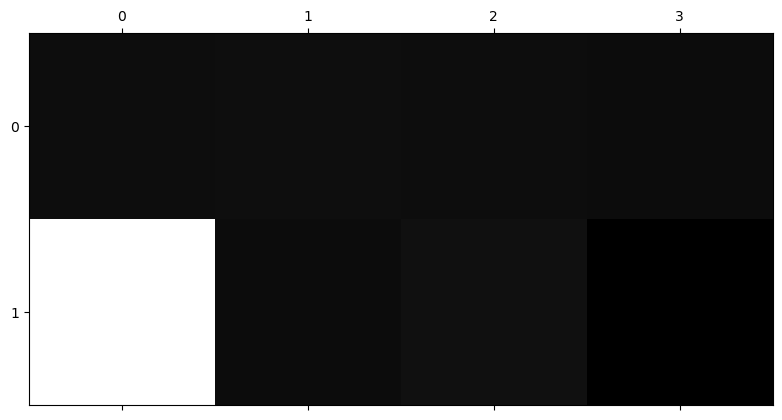

In [10]:
plt.gray()
plt.matshow(img)
plt.show()

In [11]:
df = pd.DataFrame(dataset.data,columns = dataset['feature_names'])

df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [13]:
dataset.target

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [14]:
X = df
y = dataset.target

In [15]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 2.34476576,  0.98214266,  0.62855945, ..., -0.04959654,
         1.05254828, -1.32783522],
       [ 2.33223796, -0.60701891,  0.32704136, ..., -0.09251223,
         1.04318455, -1.32284391],
       [ 1.7826994 ,  1.85618152,  1.15562047, ..., -0.02584253,
         1.03850269, -1.33282653],
       ...,
       [-1.14259331, -0.92485123, -0.09031802, ..., -0.0717345 ,
         1.77823747, -0.8237132 ],
       [-1.05458292, -0.84539315, -0.04021111, ..., -0.09122515,
         1.77823747, -0.87362627],
       [-0.78012947, -1.00430931, -0.07044252, ..., -0.04368215,
         1.75014627, -0.83369581]])

In [18]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,random_state=32,test_size=0.2)


In [31]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
X_pca.shape

(20640, 2)

In [32]:
pca.explained_variance_ratio_

array([9.99789327e-01, 1.13281110e-04])

In [37]:
import warnings 
warnings.filterwarnings('ignore')

model_per = {'score':[],'rs':[],'number_cols':[]}

for i in range(1,8):
    for j in range(1,8):
        pca = PCA(n_components=i)
    
        X_pca = pca.fit_transform(X)

        X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca,y,test_size=0.2,random_state=30)
        
        
        m = LinearRegression()
        m.fit(X_train_pca,y_train)
        score = m.score(X_test_pca,y_test)
        
        
        model_per['score'].append(score)
        model_per['rs'].append(j)
        model_per['number_cols'].append(i)
        print(i,j)
        display(clear=True)

print('done')        
        
        
        

done


In [38]:
m = LinearRegression()
m.fit(X_train,y_train)
m.score(X_test,y_test)

-0.0018364241559205574

In [40]:
m_df = pd.DataFrame(model_per)

In [41]:
m_df

,score,rs,number_cols
0,-0.001230,1,1
1,-0.001230,2,1
2,-0.001230,3,1
3,-0.001230,4,1
4,-0.001230,5,1
5,-0.001230,6,1
6,-0.001230,7,1
7,0.003594,1,2
8,0.003594,2,2
9,0.003594,3,2


<Axes: >

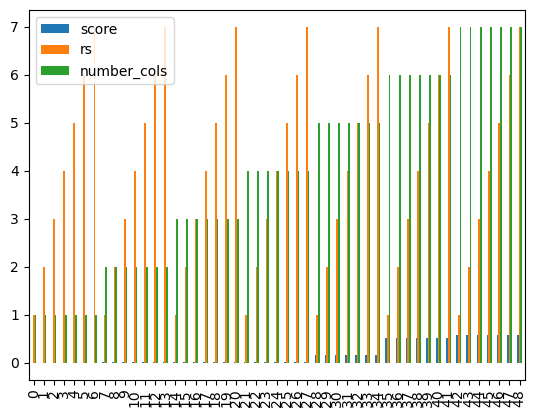

In [43]:
m_df.plot(kind='bar')